<a href="https://colab.research.google.com/github/juno-yuu/MFE-DAML/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analytics and Machine Learning: Problem Set 1

### Question 1

#### 1. Use *matplotlib* to visualize the relationship between price and horsepower and body style. Price is the dependent variable. Consider both the "log()" and "^2" transformations of price as dependent variables. Does the body style variable appear to be relevant for car prices, above and beyond horsepower?



In [ ]:
!pip install dfply

     |████████████████████████████████| 614kB 11.3MB/s 


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import seaborn           as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
from plotnine import *
from dfply import *

In [ ]:
# mount your Google Drive so you can locate your data files.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To suppress false warnings with pandas
pd.options.mode.chained_assignment = None 

In [ ]:
df = pd.read_csv("/imports-85.csv")
data1 = df[['price','horsepower','body-style','city-mpg']]
data1 = data1.dropna()

In [ ]:
#variable transformation
data1["log.pr"]= np.log(data1["price"])
data1["pr.sqr"]= (data1["price"]) ** 2

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


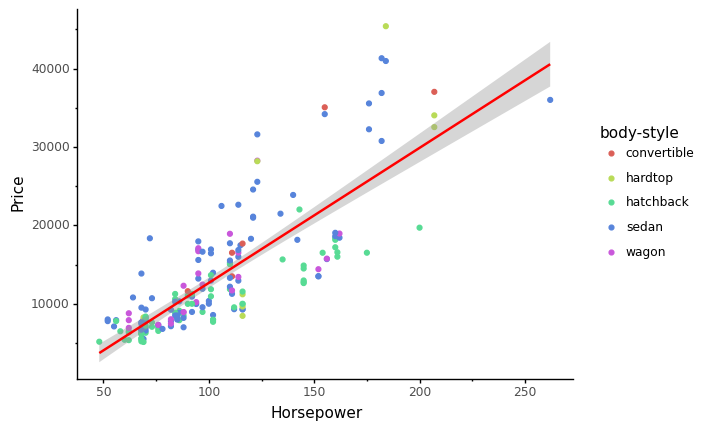

<ggplot: (8742213323213)>

In [ ]:
#plot  scatterplot between prc & horsepower
(
    ggplot(data1, aes(x='horsepower', y='price'))
    + geom_point(aes(color = 'body-style'))
    + stat_smooth(method = "lm",color= "red")
    + labs(x='Horsepower', y='Price')
    + theme_classic()
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


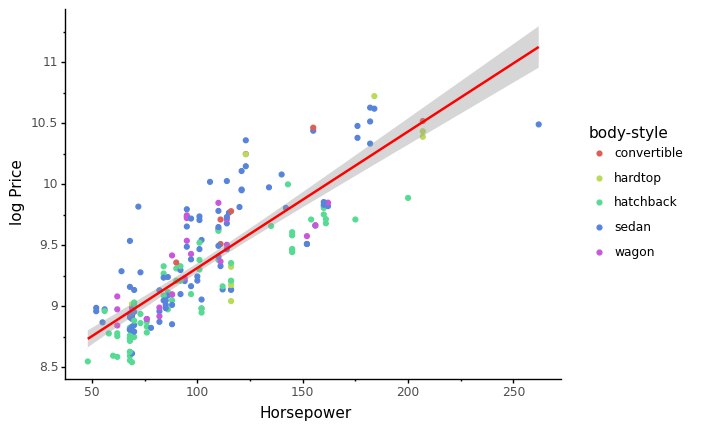

<ggplot: (8742212767433)>

In [ ]:
#plot  scatterplot between log.prc & horsepower
(   
    ggplot(data1, aes(x='horsepower', y='np.log(price)'))
    + geom_point(aes(color = 'body-style'))
    + stat_smooth(method = "lm",color= "red")
    + labs(x='Horsepower', y='log Price')
    + theme_classic()

)


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


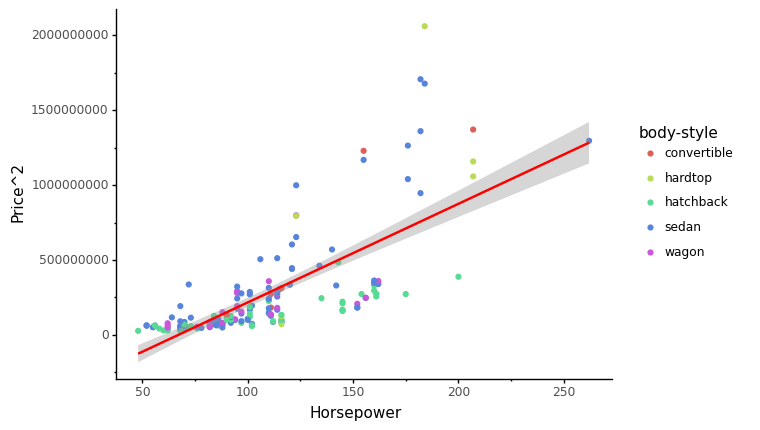

<ggplot: (8742213060849)>

In [ ]:
#plot  scatterplot between prc^2 & horsepower
(   
    ggplot(data1, aes(x='horsepower', y='price ** 2'))
    + geom_point(aes(color = 'body-style'))
    + stat_smooth(method = "lm",color= "red")
    + labs(x='Horsepower', y='Price^2')
    + theme_classic()
)

#### 2. Run a regression of your preferred specification. Perform residual diagnostics as you learned in Econometrics. What do you conclude from your regression diagnostic plots of residuals vs. fitted and residuals vs. horsepower? (Hint: You may want to use a seaborn_qqplot and scipy.stats packages for qqplot)



In [ ]:
x = data1[['horsepower']]
y = data1[['log.pr']]
lr = LinearRegression().fit(x,y)
print("Coefficient:{}".format(lr.coef_))
print("Intercept:{}".format(lr.intercept_))

Coefficient:[[0.01119058]]
Intercept:[8.19486767]


In [ ]:
model = smf.ols(formula='np.log(price) ~ horsepower',data= data1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     446.9
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           1.47e-52
Time:                        22:29:38   Log-Likelihood:                -27.845
No. Observations:                 199   AIC:                             59.69
Df Residuals:                     197   BIC:                             66.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1949      0.058    140.772      0.0

By the regression output, we have
$log(\text{price}) = 8.1949 + 0.0112 \times \text{horsepower}$

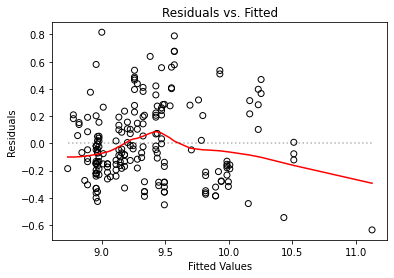

In [ ]:
# residual plot
# residual vs. fitter
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
plt.show()

In this case, there might be a non-linear relationship in the residual


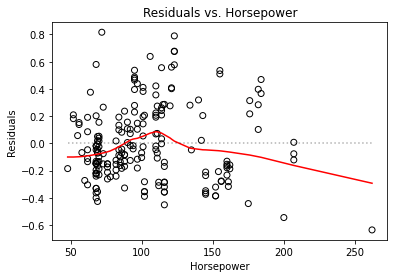

In [ ]:
horsepower = data1["horsepower"]
smoothed = lowess(residuals,horsepower)
fig, ax = plt.subplots()
ax.scatter(horsepower, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Horsepower')
ax.set_title('Residuals vs. Horsepower')
ax.plot([min(horsepower),max(horsepower)],[0,0],color = 'k',linestyle = ':', alpha = .3)
plt.show()

#### 3. Now use matplotlib to visualize the relationship between fuel efficiency (city-mpg) and horsepower. Now regress city.mpg on horsepower. Is the regression result consistent with the conclusion you would draw based on the plot? More on this next week.

In [ ]:
# variable transformation
data1["log.citympg"]= np.log(data1["city-mpg"])
data1["city-mpg.sqr"]= (data1["city-mpg"]) ** 2

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


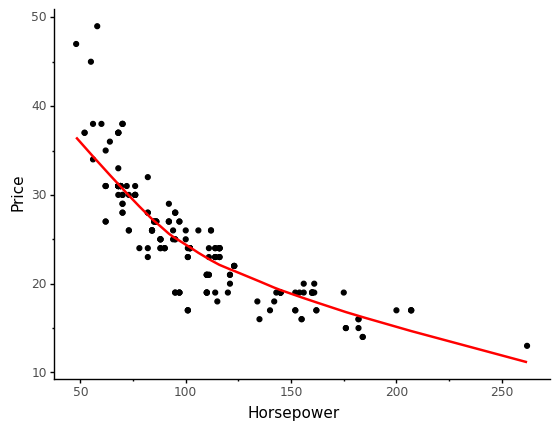

<ggplot: (8742212744297)>

In [ ]:
# fuel efficiency vs horsepower
(
    ggplot(data1, aes(x='horsepower', y='city-mpg'))
    + geom_point()
    + stat_smooth(color= "red")
    + labs(x='Horsepower', y='Price')
    + theme_classic()
)

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


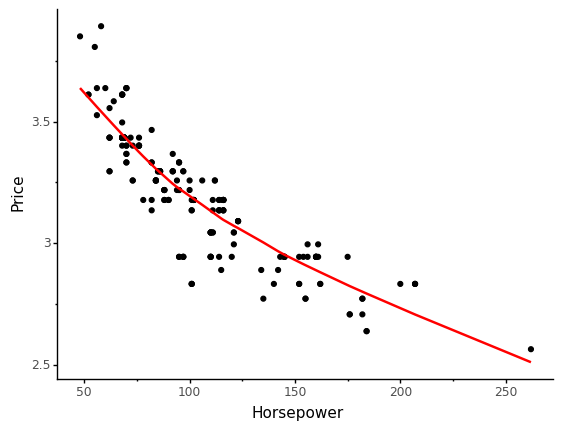

<ggplot: (8742212596893)>

In [ ]:
# fuel log efficiency vs horsepower
(
    ggplot(data1, aes(x='horsepower', y='log.citympg'))
    + geom_point()
    + stat_smooth(color= "red")
    + labs(x='Horsepower', y='Price')
    + theme_classic()
)

/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


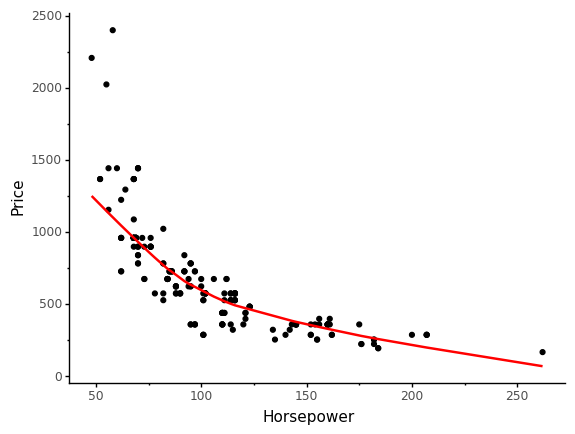

<ggplot: (8742212585981)>

In [ ]:
# fuel efficiency square vs horsepower
(
    ggplot(data1, aes(x='horsepower', y='city-mpg.sqr'))
    + geom_point()
    + stat_smooth(color= "red")
    + labs(x='Horsepower', y='Price')
    + theme_classic()
)

In [ ]:
#regress 
citympg = data1["city-mpg"]
model = smf.ols(formula='citympg ~ horsepower',data= data1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                citympg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     412.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           3.42e-50
Time:                        22:29:55   Log-Likelihood:                -540.52
No. Observations:                 199   AIC:                             1085.
Df Residuals:                     197   BIC:                             1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.8138      0.765     52.017      0.0

### Question 2

#### a. Construct decile sorts (10 portfolios) as in the class notes, but now based on the issuance variable lnIssue. Give the average return to each decile portfolio, valueweighting stocks within each portfolio each year, equal-weighting across years.

In [ ]:
data2 = pd.read_csv("/StockRetAcct_DT.csv")
data2.head()
# create excess returns
data2['ExRet'] = np.exp(data2.lnAnnRet)-np.exp(data2.lnRf)

In [ ]:

# sort into 10 bins(vingtiles) by the issuance
data2['issue_vingtile_yr']=np.nan
for year in range(1981,2015):
  dt = data2[data2['year'] == year]
  inds = np.where(data2['year'] == year)
  data2['issue_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnIssue'],10,labels=np.arange(1,11,1)).values.to_list()

# Remove NAs
data2 = data2[data2['issue_vingtile_yr'].notna()]

# sort into portfolios for each year vingtile in each year and atake the average , then average over years
EW_Issue_MutualFunds_yr = pd.DataFrame({'issue_vingtile_yr':np.tile(range(1,11),34),
                       'year':np.sort(np.tile(range(1981,2015),10)),
                       'MeanExRetYr':np.empty(((2014-1981+1)*10))})
for year in range(1981,2015):
  dt = data2[data2['year'] == year]
  inds = np.where(EW_Issue_MutualFunds_yr['year'] == year)
  EW_Issue_MutualFunds_yr['MeanExRetYr'].iloc[inds] = list(dt.groupby('issue_vingtile_yr')['ExRet'].mean())

# take avg for each bin across years
EW_Issue_MutualFunds_yr_mean = EW_Issue_MutualFunds_yr.groupby('issue_vingtile_yr')['MeanExRetYr'].mean()

print(EW_Issue_MutualFunds_yr_mean)

issue_vingtile_yr
1     0.110398
2     0.093631
3     0.084439
4     0.090071
5     0.092172
6     0.103268
7     0.096026
8     0.094350
9     0.079348
10    0.039357
Name: MeanExRetYr, dtype: float64


#### b. Plot the average return to these 10 portfolios, similar to what we did in the Topic 1(ef) notes. Discuss whether the pattern seems linear or not.

[Text(0.5, 1.0, 'log Issuance Value vs. Excess Return')]

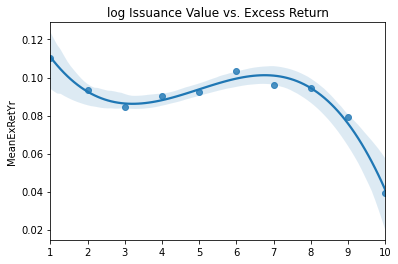

In [ ]:
plt.figure()
ax = sns.regplot(x=np.arange(1,11),y = EW_Issue_MutualFunds_yr_mean,
                 fit_reg=True,order=3)
ax.set(title = 'log Issuance Value vs. Excess Return')

As we could see from the graph, the patter seems not linear.

#### c. Since most of the 'action' is in the extreme portfolios, consider a model where expected returns to stocks is linear in a transformed issuance-characteristic that takes three values: -1 if the stock's issuance is in Decile 1, 1 if the stock's issuance is in decile 10, and 0 otherwise.

In [ ]:

# create a list of conditions
conditions = [
  (EW_Issue_MutualFunds_yr['issue_vingtile_yr'] == 1),
  (EW_Issue_MutualFunds_yr['issue_vingtile_yr'] > 1)&(EW_Issue_MutualFunds_yr['issue_vingtile_yr'] < 10),
  (EW_Issue_MutualFunds_yr['issue_vingtile_yr'] == 10)
]
# create a list of values we want to assign for each condition
values = [-1,0,1]
#create a new column and use np.select to assign values to it using outy lists as argument
EW_Issue_MutualFunds_yr['issuance'] = np.select(conditions,values)
print(EW_Issue_MutualFunds_yr)
#run FMB regression
def fmreg(data,formula):
  return smf.ols(formula,data=data).fit().params[:]
out = EW_Issue_MutualFunds_yr.groupby('year').apply(fmreg,'MeanExRetYr ~ issuance')
def fm_summary(p):
  s = p.describe().T
  s['std_error'] = s['std']/np.sqrt(s['count'])
  s['tstat'] = s['mean']/s['std_error']
  return s[['mean','std_error','tstat']]

fm_summary(out)


     issue_vingtile_yr  year  MeanExRetYr  issuance
0                    1  1981    -0.196050        -1
1                    2  1981    -0.219086         0
2                    3  1981    -0.291431         0
3                    4  1981    -0.271338         0
4                    5  1981    -0.272522         0
..                 ...   ...          ...       ...
335                  6  2014     0.011997         0
336                  7  2014     0.006231         0
337                  8  2014     0.088734         0
338                  9  2014     0.105056         0
339                 10  2014     0.086498         1

[340 rows x 4 columns]


,mean,std_error,tstat
Intercept,0.088306,0.032245,2.738598
issuance,-0.035521,0.010454,-3.397874


### Question 3

#### a. Create independent quintile sorts based on book-to-market (lnBM) and size (lnME). That is create a quintile variable by year for book-to-market and then create a quintile variable by year for size.

In [ ]:
# Create quintile sorts based on lnBM
# Sort into 5 bins (vingtiles) by the book-to-market value within year
data2['bm_vingtile_yr']=np.nan
for year in range(1981,2015):
    dt   = data2[data2['year']==year]
    inds = np.where(data2['year']==year)
    data2['bm_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnBM'], 5, 
                                   labels=np.arange(1, 6, 1)).values.to_list()
# Remove empty observations due to missing lnBM observations
data2 = data2[data2['bm_vingtile_yr'].notna()]

# Then quintile sort based on size(lnME)
# Sort into 5 bins (vingtiles) by the size value within year
EW_MutualFunds_yr['ME_vingtile_yr']=np.nan
for year in range(1981,2015):
    dt   = data2[data2['year']==year]
    inds = np.where(data2['year']==year)
    data2['ME_vingtile_yr'].iloc[inds] = pd.qcut(dt['lnME'], 5, 
                                   labels=np.arange(1, 6, 1)).values.to_list()
# Remove empty observations due to missing lnME observations
data2 = data2[data2['ME_vingtile_yr'].notna()]

EW_BM_MutualFunds_yr_size1=pd.DataFrame({'bm_vingtile_yr':np.arange(1, 6, 1),
                                   'MeanExRet':np.empty((5))})
EW_BM_MutualFunds_yr_size2=pd.DataFrame({'bm_vingtile_yr':np.arange(1, 6, 1),
                                   'MeanExRet':np.empty((5))})
EW_BM_MutualFunds_yr_size3=pd.DataFrame({'bm_vingtile_yr':np.arange(1, 6, 1),
                                   'MeanExRet':np.empty((5))})
EW_BM_MutualFunds_yr_size4=pd.DataFrame({'bm_vingtile_yr':np.arange(1, 6, 1),
                                   'MeanExRet':np.empty((5))})
EW_BM_MutualFunds_yr_size5=pd.DataFrame({'bm_vingtile_yr':np.arange(1, 6, 1),
                                   'MeanExRet':np.empty((5))})
data2_size1=data2[data2['ME_vingtile_yr']==1]
data2_size2=data2[data2['ME_vingtile_yr']==2]
data2_size3=data2[data2['ME_vingtile_yr']==3]
data2_size4=data2[data2['ME_vingtile_yr']==4]
data2_size5=data2[data2['ME_vingtile_yr']==5]
  
ret_1,ret_2,ret_3,ret_4,ret_5 = np.empty([]),np.empty([]),np.empty([]),np.empty([]),np.empty([])
for year in range(1981,2015):
    dt_1 = data2_size1[data2_size1['year']==year]
    dt_2 = data2_size2[data2_size2['year']==year]
    dt_3 = data2_size3[data2_size3['year']==year]
    dt_4 = data2_size4[data2_size4['year']==year]
    dt_5 = data2_size5[data2_size5['year']==year]
    for bin in range(1,6):
       np.mean(dt_1[dt_1['bm_vingtile_yr']==bin].ExRet)
       np.mean(dt_2[dt_2['bm_vingtile_yr']==bin].ExRet)
       np.mean(dt_3[dt_3['bm_vingtile_yr']==bin].ExRet)
       np.mean(dt_4[dt_4['bm_vingtile_yr']==bin].ExRet)
       np.mean(dt_5[dt_5['bm_vingtile_yr']==bin].ExRet)
       ret_1=np.append(ret_1, np.mean(dt_1[dt_1['bm_vingtile_yr']==bin].ExRet))
       ret_2=np.append(ret_2, np.mean(dt_2[dt_2['bm_vingtile_yr']==bin].ExRet))
       ret_3=np.append(ret_3, np.mean(dt_3[dt_3['bm_vingtile_yr']==bin].ExRet))
       ret_4=np.append(ret_4, np.mean(dt_4[dt_4['bm_vingtile_yr']==bin].ExRet))
       ret_5=np.append(ret_5, np.mean(dt_5[dt_5['bm_vingtile_yr']==bin].ExRet))
        
EW_BM_MutualFunds_yr_size1['MeanExRet'] = np.mean(np.reshape(ret_1[1:],(34,5)),axis=0)
EW_BM_MutualFunds_yr_size2['MeanExRet'] = np.mean(np.reshape(ret_2[1:],(34,5)),axis=0)
EW_BM_MutualFunds_yr_size3['MeanExRet'] = np.mean(np.reshape(ret_3[1:],(34,5)),axis=0)
EW_BM_MutualFunds_yr_size4['MeanExRet'] = np.mean(np.reshape(ret_4[1:],(34,5)),axis=0)
EW_BM_MutualFunds_yr_size5['MeanExRet'] = np.mean(np.reshape(ret_5[1:],(34,5)),axis=0)

#### b.For each size quintile, plot the average returns to the five book-to-market quintile portfolios. So, for size quintile 1, and book-to-market quintile 3, the stocks in this portfolio all have size quintile equal to 1 and book-to-market quintile equal to 3. Thus, I'm looking for five plots here, one for each size quintile.

[Text(0.5, 1.0, 'EW Size 5 Firm Book-to-Market bins vs. Excess Returns')]

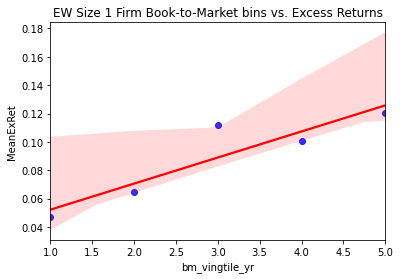

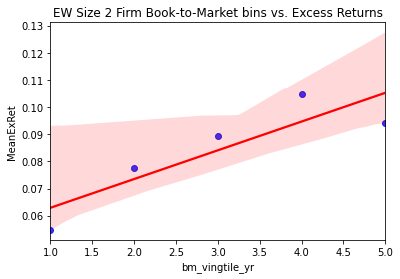

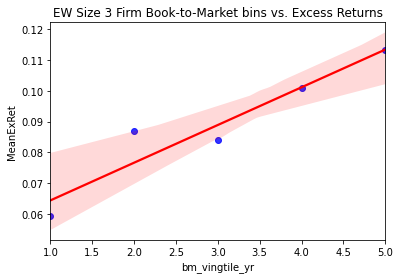

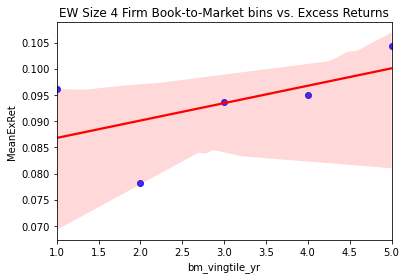

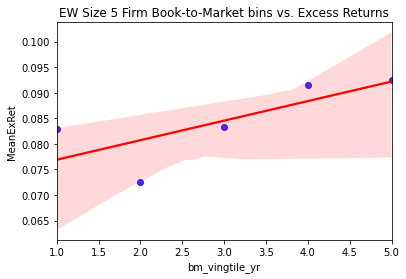

In [ ]:
# Plot the different strategies
plt.figure()
ax=sns.regplot (x     = 'bm_vingtile_yr' ,
                y     = 'MeanExRet',
                data  = EW_BM_MutualFunds_yr_size1,
                scatter_kws={"color": "blue"},
                line_kws={"color": "red"}, 
                fit_reg=True,
                order = 1
                )
ax.set(title='EW Size 1 Firm Book-to-Market bins vs. Excess Returns')
plt.figure()
ax=sns.regplot (x     = 'bm_vingtile_yr' ,
                y     = 'MeanExRet',
                data  = EW_BM_MutualFunds_yr_size2,
                scatter_kws={"color": "blue"},
                line_kws={"color": "red"}, 
                fit_reg=True,
                order = 1
                )
ax.set(title='EW Size 2 Firm Book-to-Market bins vs. Excess Returns')
plt.figure()
ax=sns.regplot (x     = 'bm_vingtile_yr' ,
                y     = 'MeanExRet',
                data  = EW_BM_MutualFunds_yr_size3,
                scatter_kws={"color": "blue"},
                line_kws={"color": "red"}, 
                fit_reg=True,
                order = 1
                )
ax.set(title='EW Size 3 Firm Book-to-Market bins vs. Excess Returns')
plt.figure()
ax=sns.regplot (x     = 'bm_vingtile_yr' ,
                y     = 'MeanExRet',
                data  = EW_BM_MutualFunds_yr_size4,
                scatter_kws={"color": "blue"},
                line_kws={"color": "red"},
                fit_reg=True,
                order = 1
                )
ax.set(title='EW Size 4 Firm Book-to-Market bins vs. Excess Returns')
plt.figure()
ax=sns.regplot (x     = 'bm_vingtile_yr' ,
                y     = 'MeanExRet',
                data  = EW_BM_MutualFunds_yr_size5,
                scatter_kws={"color": "blue"},
                line_kws={"color": "red"},
                fit_reg=True,
                order = 1
                )
ax.set(title='EW Size 5 Firm Book-to-Market bins vs. Excess Returns')